In [17]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv("data.csv")

In [19]:
df.index = pd.to_datetime(df["busi_date"], format = "%Y/%m/%d")

In [20]:
df["industry"] = df["industry"].astype(str)

In [21]:
df["industry"] = df["industry"].str.lstrip("ind")
df["industry"] = df["industry"].str.zfill(2)
df["industry"] = "ind"+ df["industry"]

In [22]:
df1 = pd.read_csv("data20230523.csv")

In [23]:
div = df1.pivot_table(index = "busi_date", values = "prev_ttl_asset")

In [24]:
div.index = pd.to_datetime(div.index, format = "%Y/%m/%d")

In [25]:
df2 = df.groupby(["industry",df.index])[["mktval","daily_profit"]].sum()
df2 = df2.join(div)

In [26]:
df2["yield"] = df2["daily_profit"]/df2["prev_ttl_asset"]

In [27]:
df2["weight"] = df2["mktval"]/df2["prev_ttl_asset"]

In [28]:
df3 = df2

In [29]:
df3 = df3.drop(["mktval","daily_profit","prev_ttl_asset"],axis=1)

In [30]:
df4 = pd.DataFrame(index = df3.index)

In [31]:
df4["Results"] = df3["yield"]/df3["weight"]

In [32]:
df4

Results
industry busi_date           
ind01    2023-05-04  0.006035
         2023-05-05 -0.019329
         2023-05-08 -0.004893
         2023-05-09 -0.016729
         2023-05-10 -0.000791
...                       ...
ind31    2023-05-15  0.005406
         2023-05-16 -0.000351
         2023-05-17 -0.010672
         2023-05-18 -0.001821
         2023-05-19 -0.000194

[360 rows x 1 columns]

In [1432]:
df5 = df4

In [1433]:
df4 = df4.groupby(["industry"])[["Results"]].sum()

In [1434]:
df4 = df4.sort_values(by="Results", ascending = False)

In [1436]:
df5 = df5.reset_index()

In [1437]:
df5 = df5.pivot_table(index = "busi_date", columns = "industry", values = "Results")

In [1438]:
df5

industry,ind01,ind02,ind03,ind04,ind05,ind06,ind07,ind09,ind10,ind11,...,ind22,ind23,ind24,ind25,ind26,ind27,ind28,ind29,ind30,ind31
busi_date,,,,,,,,,,,,,,,,,,,,,
2023-05-04,0.006035,-0.002757,0.022601,0.023501,-0.007988,-0.045085,0.014522,-0.030190,-0.005451,-0.004335,...,0.075581,-0.030497,-0.000980,-0.005551,-0.016706,-0.010977,0.018017,-0.023156,0.030485,-0.007022
2023-05-05,-0.019329,-0.011914,-0.003070,-0.007914,-0.008008,-0.007904,-0.019482,-0.019606,-0.008167,0.003775,...,0.000103,0.001652,-0.013802,-0.014251,-0.014791,-0.002407,0.002797,-0.013728,0.005113,-0.009133
2023-05-08,-0.004893,0.018019,0.005016,0.007476,0.002908,-0.002225,0.008378,0.029035,0.021821,-0.008238,...,0.011307,-0.010667,0.045343,0.011460,0.021217,0.036317,0.027258,0.046423,0.015511,-0.005408
2023-05-09,-0.016729,-0.013006,-0.008110,0.003479,-0.005551,-0.004790,-0.026274,-0.019256,0.010948,0.002083,...,-0.027347,-0.008601,-0.026902,-0.014584,-0.004536,-0.004039,0.002128,-0.028783,0.018246,-0.027075
2023-05-10,-0.000791,0.032771,-0.012775,-0.010498,0.007264,-0.006832,-0.023185,-0.023636,-0.012303,-0.004543,...,-0.011191,-0.010832,-0.007308,0.001734,-0.007131,-0.006399,-0.029981,-0.027600,-0.004747,0.009948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-15,0.013842,0.016951,0.008220,-0.002961,0.017242,0.010288,-0.005225,0.018532,0.005955,0.010703,...,-0.022356,0.013382,0.032856,0.032354,0.005112,0.022586,0.026389,0.002713,0.002556,0.005406
2023-05-16,0.005197,-0.007431,-0.014101,-0.002544,-0.006318,-0.020032,-0.027935,-0.012193,-0.013583,-0.009622,...,-0.001504,-0.024669,-0.009406,-0.008936,-0.036325,0.002227,-0.016186,-0.003404,-0.007176,-0.000351
2023-05-17,-0.008423,-0.007801,-0.005595,-0.000320,-0.007659,-0.003657,-0.000130,-0.009282,-0.000934,-0.009599,...,-0.004222,-0.004363,0.026152,-0.011965,0.001700,-0.010771,-0.009272,-0.001428,0.004066,-0.010672


/usr/local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 34892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 19994 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 32047 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 35745 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 30410 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 29575 missing from current font.
  font.set_

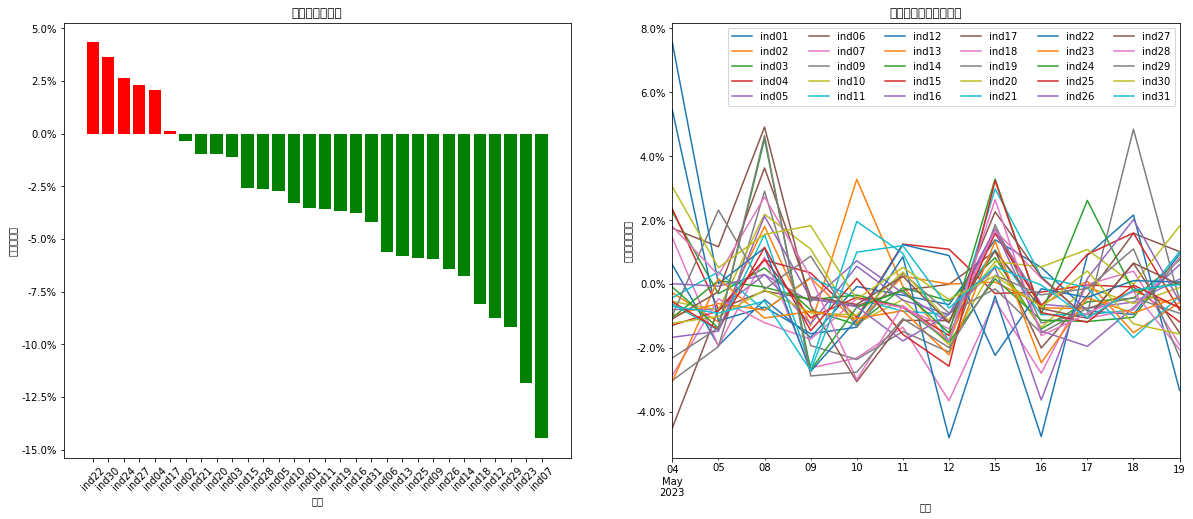

In [1440]:
plt.figure(figsize=(20,8))
colors = ["green" if value < 0 else "red" for value in df4["Results"]]
ax=plt.subplot(121)
ax.bar(df4.index, df4["Results"], color = colors)
# industry.plot(kind='bar', ax=ax)
ax.set(title="行业累计益率图", xlabel='行业', ylabel='累计收益率')
ax.set_xticklabels(df4.index,rotation=45)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

ax=plt.subplot(122)
df5.plot(ax=ax)
ax.legend(loc = "upper right", ncol = 6)
ax.set(title="行业累计收益率变化图", xlabel='日期', ylabel='累计收益率变化')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

In [1386]:
weights_300 = index_weights('000300.XSHG', '20230520')

In [1387]:
weights_300

order_book_id
603993.XSHG    0.00217
603288.XSHG    0.00505
601238.XSHG    0.00121
002709.XSHE    0.00254
603185.XSHG    0.00094
                ...   
002648.XSHE    0.00123
601360.XSHG    0.00235
601336.XSHG    0.00167
300316.XSHE    0.00230
300347.XSHE    0.00245
Length: 300, dtype: float64

In [1414]:
df_300 = get_price(order_book_ids=weights_300.index, start_date="20230428", end_date="20230520", frequency="1d")
 

In [1416]:
df_300 = df_300.groupby(["order_book_id", "date"])[["close"]].sum()

In [1417]:
df_300

close
order_book_id date              
600436.XSHG   2023-04-28  271.93
              2023-05-04  273.65
              2023-05-05  273.81
              2023-05-08  301.19
              2023-05-09  312.95
...                          ...
002736.XSHE   2023-05-15    9.59
              2023-05-16    9.59
              2023-05-17    9.53
              2023-05-18    9.49
              2023-05-19    9.37

[3900 rows x 1 columns]

In [1419]:
df8 = df_300.apply(lambda x: (x - df_300["close"].shift(1)) / df_300["close"].shift(1))

In [1420]:
df8

close
order_book_id date                
600436.XSHG   2023-04-28       NaN
              2023-05-04  0.006325
              2023-05-05  0.000585
              2023-05-08  0.099996
              2023-05-09  0.039045
...                            ...
002736.XSHE   2023-05-15 -0.001042
              2023-05-16  0.000000
              2023-05-17 -0.006257
              2023-05-18 -0.004197
              2023-05-19 -0.012645

[3900 rows x 1 columns]